In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
data_as_frame = pd.read_csv('output/cleaned_data.csv')

In [3]:
data_as_frame.head()

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots,plant_growth
0,6,0.0,2.0,1.0,0.0,1,1,1.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,4,0.0,2.0,1.0,0.0,2,0,2.0,1.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3,0.0,2.0,1.0,0.0,1,0,2.0,1.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,2.0,1.0,0.0,1,0,2.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6,0.0,2.0,1.0,0.0,2,0,1.0,0.0,2.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
x = data_as_frame.drop('plant_growth', axis=1)
y = data_as_frame['plant_growth']

In [5]:
columns = data_as_frame.columns
print(columns)

Index(['date', 'plant_stand', 'precip', 'temp', 'hail', 'crop_hist',
       'area_dam', 'sever', 'seed_tmt', 'germ', 'leaves', 'leaf_halo',
       'leaf_marg', 'leaf_size', 'leaf_shread', 'leaf_malf', 'leaf_mild',
       'stem', 'lodging', 'stem_cankers', 'canker_lesion', 'fruiting_bodies',
       'ext_decay', 'mycelium', 'int_discolor', 'sclerotia', 'fruit_pods',
       'fruit_spots', 'seed', 'mold_growth', 'seed_discolor', 'seed_size',
       'shriveling', 'roots', 'plant_growth'],
      dtype='object')


In [6]:
df = pd.DataFrame(x)

In [7]:
df.head()

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,int_discolor,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots
0,6,0.0,2.0,1.0,0.0,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,2.0,1.0,0.0,2,0,2.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,2.0,1.0,0.0,1,0,2.0,1.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,2.0,1.0,0.0,1,0,2.0,0.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,2.0,1.0,0.0,2,0,1.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
z = np.abs(stats.zscore(df))
print(z)

[[1.35987344 0.78714455 0.58047909 ... 0.23746785 0.20657109 0.13654007]
 [0.15348216 0.78714455 0.58047909 ... 0.23746785 0.20657109 0.13654007]
 [0.44971347 0.78714455 0.58047909 ... 0.23746785 0.20657109 0.13654007]
 ...
 [1.35987344 1.27041469 0.58047909 ... 0.23746785 0.20657109 0.13654007]
 [0.15348216 0.78714455 0.58047909 ... 0.23746785 0.20657109 0.13654007]
 [0.7566778  0.78714455 0.58047909 ... 0.23746785 0.20657109 0.13654007]]


### The first array contains the list of row numbers and second array respective column numbers

In [9]:
print(z[140][31])

4.211096452627668


In [10]:
threshold = 3
outliers_points = np.where(z > 3)

In [11]:
type(outliers_points)

tuple

In [12]:
rows = outliers_points[0]
cols = outliers_points[1]

In [13]:
rows

array([  0,   6,  10,  10,  11,  11,  11,  12,  12,  13,  13,  14,  14,
        15,  15,  16,  16,  16,  17,  17,  18,  18,  19,  19,  20,  20,
        21,  22,  22,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  36,  37,  38,  39,  40,  41,  42,  42,
        43,  44,  45,  52,  53,  54,  55,  56,  57,  76,  76,  76,  77,
        77,  77,  78,  78,  79,  79,  79,  80,  80,  81,  81,  82,  82,
        83,  83,  84,  84,  85,  85, 130, 136, 137, 137, 139, 139, 139,
       140, 140, 140, 140, 141, 142, 142, 142, 143, 143, 144, 144, 144,
       145, 146, 146, 147, 148, 149, 149, 150, 151, 152, 152, 153, 154,
       155, 157, 157, 157, 158, 158, 158, 160, 160, 162, 162, 162, 163,
       164, 164, 164, 165, 165, 166, 167, 167, 168, 168, 168, 169, 169,
       169, 172, 172, 172, 173, 174, 174, 174, 175, 175, 175, 177, 180,
       182, 183, 190, 209, 247, 247, 247, 272, 273, 274, 275, 276, 276,
       277, 277, 278, 278, 279, 279, 280, 280, 280, 281, 281, 28

In [14]:
cols

array([18, 18, 24, 25, 18, 24, 25, 24, 25, 24, 25, 24, 25, 24, 25, 18, 24,
       25, 24, 25, 24, 25, 24, 25, 23, 26, 26, 18, 23, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 18, 26, 26, 26, 26, 26, 26, 18,
       26, 26, 26, 26, 18, 18, 18, 18, 18, 18, 15, 16, 29, 15, 16, 29, 16,
       29, 15, 16, 29, 16, 29, 16, 29, 16, 29, 16, 29, 16, 29, 16, 29, 15,
       33, 29, 30, 15, 31, 33, 29, 30, 31, 33, 33, 29, 30, 31, 31, 33, 29,
       30, 31, 33, 18, 30, 30, 30, 18, 30, 30, 30, 18, 30, 30, 30, 30, 29,
       30, 32, 29, 31, 32, 29, 30, 29, 31, 32, 30, 29, 31, 32, 29, 30, 18,
       29, 31, 30, 31, 32, 29, 31, 32, 29, 31, 32, 18, 29, 31, 32, 29, 31,
       32, 15, 15, 15, 15, 30, 30, 30, 31, 32, 18, 18, 18, 18, 24, 25, 24,
       25, 24, 25, 24, 25, 18, 24, 25, 24, 25, 24, 25, 24, 25, 24, 25, 24,
       25, 26, 33, 26, 26, 26, 26, 26, 23, 26, 18, 23, 26, 23, 26, 23, 26,
       26, 26, 26, 26, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 16, 29, 15,
       16, 29, 16, 29, 16

In [15]:
set(cols)

{15, 16, 18, 23, 24, 25, 26, 29, 30, 31, 32, 33}

In [16]:
df.iloc[rows, cols] = np.nan

In [17]:
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))

In [18]:
df.isna().sum()

date               0
plant_stand        0
precip             0
temp               0
hail               0
crop_hist          0
area_dam           0
sever              0
seed_tmt           0
germ               0
leaves             0
leaf_halo          0
leaf_marg          0
leaf_size          0
leaf_shread        0
leaf_malf          0
leaf_mild          0
stem               0
lodging            0
stem_cankers       0
canker_lesion      0
fruiting_bodies    0
ext_decay          0
mycelium           0
int_discolor       0
sclerotia          0
fruit_pods         0
fruit_spots        0
seed               0
mold_growth        0
seed_discolor      0
seed_size          0
shriveling         0
roots              0
dtype: int64

In [19]:
x = df

In [20]:
x.head()

,date,plant_stand,precip,temp,hail,crop_hist,area_dam,sever,seed_tmt,germ,...,int_discolor,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots
0,6,0.0,2.0,1.0,0.0,1,1,1.0,0.0,0.0,...,0.076923,0.0,0.208791,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,2.0,1.0,0.0,2,0,2.0,1.0,1.0,...,0.000000,0.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,2.0,1.0,0.0,1,0,2.0,1.0,2.0,...,0.000000,0.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,2.0,1.0,0.0,1,0,2.0,0.0,1.0,...,0.000000,0.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,2.0,1.0,0.0,2,0,1.0,0.0,2.0,...,0.000000,0.0,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: plant_growth, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [23]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(449, 34) (449,) (113, 34) (113,)


In [24]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):

    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


In [25]:
cm_plot_labels = data_as_frame.plant_growth.value_counts().keys().tolist()

# Logistic Regression

In [26]:
logistic_model = LogisticRegression()

In [27]:
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_log_pred = logistic_model.predict(x_test)

In [29]:
print(classification_report(y_true=y_test, y_pred=y_log_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97        87
          1       0.92      0.85      0.88        26

avg / total       0.95      0.95      0.95       113



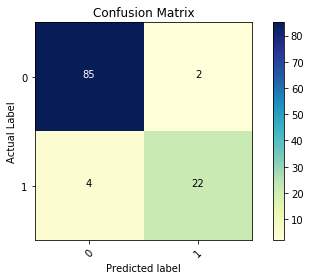

In [30]:
log_cm = confusion_matrix(y_true=y_test, y_pred=y_log_pred)
plot_confusion_matrix(log_cm,cm_plot_labels)

In [31]:
log_acc = accuracy_score(y_pred=y_log_pred,y_true=y_test)
print('Validation Accuracy : ',log_acc*100)

Validation Accuracy :  94.69026548672566


# Random Forest

In [32]:
forest = RandomForestClassifier(n_estimators=200)

In [33]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_pred = forest.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96        87
          1       0.88      0.85      0.86        26

avg / total       0.94      0.94      0.94       113



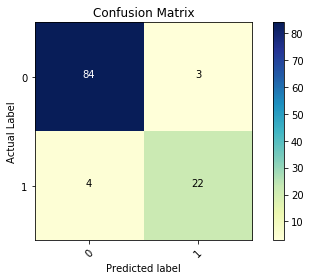

In [36]:
rf_cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(rf_cm,cm_plot_labels)

In [37]:
rf_acc = accuracy_score(y_pred=y_pred,y_true=y_test)
print('Validation Accuracy : ',rf_acc*100)

Validation Accuracy :  93.80530973451327
